<a href="https://colab.research.google.com/github/vuongngo1234/report-homework2/blob/main/monan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
from os import listdir
from numpy import asarray
from numpy import save
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from keras.models import Sequential
from keras.layers import Dense, Activation, BatchNormalization, Dropout, Conv2D, MaxPooling2D, Flatten
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

#mount drive vao code
#from google.colab import drive
#drive.mount('/content/drive/monanvietnam/monan')

In [ ]:
import os
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.utils import to_categorical, load_img, img_to_array
from numpy import save, asarray

folder = '/content/drive/MyDrive/monanvietnam/monan'

photos, labels = list(), list()

# duyệt qua danh sách các tệp tin trong thư mục
for file in os.listdir(folder):
    # kiểm tra nếu tệp tin là một tệp hình ảnh
    if file.endswith('.jpg') :
        # kiểm tra tên của tệp tin để đưa hình ảnh và nhãn vào danh sách tương ứng
        if file.startswith('hutieu'):
            output = 0
        elif file.startswith('phobo'):
            output = 1
        elif file.startswith('banhmi'):
            output = 2
        elif file.startswith('chagio'):
            output = 3
        elif file.startswith('buncha'):
            output = 4
        elif file.startswith('comtam'):
            output = 5
        elif file.startswith('banhxeo'):
            output = 6
        elif file.startswith('bunbohue'):
            output = 7
        elif file.startswith('banhchung'):
            output = 8
        elif file.startswith('goicuon'):
            output = 9
        else:
            continue

        # load hình ảnh và chuyển thành mảng numpy
        if output is not None:
          photo = load_img(os.path.join(folder, file), target_size=(200, 200, 3))
          photo = img_to_array(photo)

        # thêm hình ảnh và nhãn vào danh sách tương ứng
          photos.append(photo)
          labels.append(output)

photos = np.array(photos)/255
labels = np.array(labels)
labels = to_categorical(labels, 10)
# tạo model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(photos, labels, epochs=30, batch_size=64,verbose =1)

Epoch 1/30
1/1 [==============================] - 4s 4s/step - loss: 2.4106 - accuracy: 0.1765
Epoch 2/30
1/1 [==============================] - 3s 3s/step - loss: 22.5582 - accuracy: 0.1176
Epoch 3/30
1/1 [==============================] - 2s 2s/step - loss: 19.0018 - accuracy: 0.0588
Epoch 4/30
1/1 [==============================] - 2s 2s/step - loss: 10.4322 - accuracy: 0.1176
Epoch 5/30
1/1 [==============================] - 2s 2s/step - loss: 10.9327 - accuracy: 0.0588
Epoch 6/30
1/1 [==============================] - 2s 2s/step - loss: 4.3318 - accuracy: 0.0588
Epoch 7/30
1/1 [==============================] - 2s 2s/step - loss: 2.6723 - accuracy: 0.2353
Epoch 8/30
1/1 [==============================] - 2s 2s/step - loss: 2.0071 - accuracy: 0.3529
Epoch 9/30
1/1 [==============================] - 4s 4s/step - loss: 1.7155 - accuracy: 0.4706
Epoch 10/30
1/1 [==============================] - 3s 3s/step - loss: 1.5882 - accuracy: 0.5294
Epoch 11/30
1/1 [============================

1/1 [==============================] - 0s 271ms/step
[[0.19054875 0.14095588 0.16476053 0.07995139 0.0507054  0.09342199
  0.03261714 0.07380589 0.03884874 0.13438436]]


'banhchung'

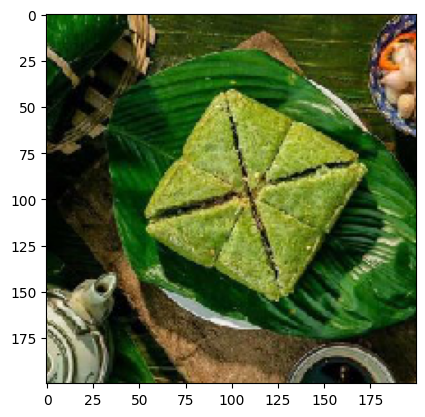

In [ ]:
img= load_img('/content/drive/MyDrive/monanvietnam/monan/banhchung.jfif', target_size=(200,200,3))
model.save('monanvitnam.h5')
classes = ['banhchung','banhxeo','hutieu','comtam','bunbohue','buncha','phobo','banhmi','chagio','goicuon']
#thử predict bằng model
#thử predict bằng model

plt.imshow(img)
imgRe = img_to_array(img)
imgRe = imgRe.reshape(1,200,200,3)  
imgRe = imgRe.astype('float32')
imgRe /= 255
y_pred = model.predict(imgRe)
print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
y_classes
classes[y_classes[0]]